### Time Series Analysis using Arima model for Air passengers data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\dinee\Downloads\AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [418]:
data.Month = data.Month.astype('datetime64')

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [420]:
data.set_index('Month', inplace = True)

In [421]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [422]:
data.rename(columns = {'#Passengers' : 'Passengers'}, inplace = True)

In [423]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [424]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


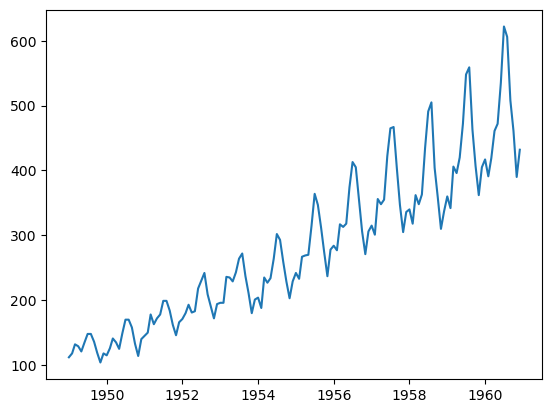

In [425]:
plt.plot(data) # it is a upward trend so need to convert to stationary

In [426]:
# pip install statsmodel

In [427]:
from statsmodels.graphics.tsaplots import plot_acf

Figure(640x480)


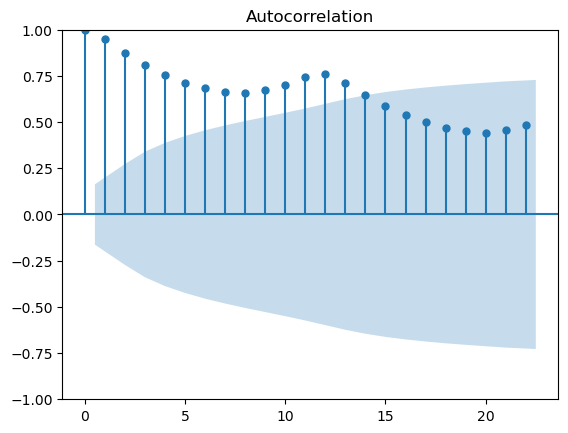

In [428]:
print(plot_acf(data))

In [429]:
data1 = data.diff(periods = 1)

In [430]:
data1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [431]:
data1.drop(index='1949-01-01')

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [432]:
data1 = data1.iloc[1:]

In [433]:
data1.head()

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


Figure(640x480)


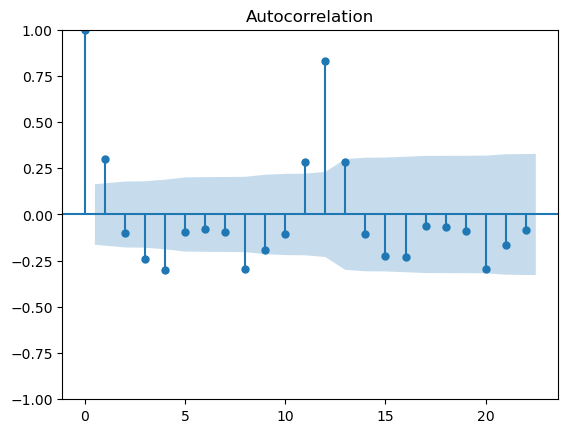

In [434]:
print(plot_acf(data1))

In [435]:
data2 = data1.diff(periods = 1)

In [436]:
data2.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [437]:
data2 = data2.iloc[1:]

In [438]:
data2.head()

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


Figure(640x480)


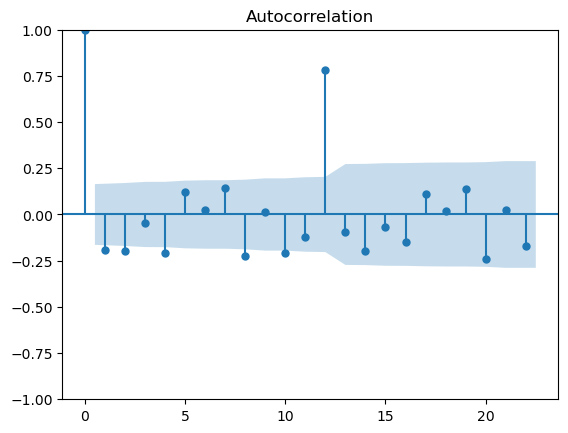

In [439]:
print(plot_acf(data2)) # now its ok

In [440]:
data2.shape

(142, 1)

In [441]:
train = data2[:100]
test = data2[100:]

In [442]:
train

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1957-02-01,-23.0
1957-03-01,69.0
1957-04-01,-63.0


In [443]:
test.shape

(42, 1)

In [444]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from statsmodels.tsa.ar_model import AutoReg

 if we have daily sales data for a store, a lag(p) of 1 would correspond to the sales from the previous day, a non-seasonal lag of 2 would correspond to the sales from two days ago, and so on.

On the other hand, seasonal lags are lagged variables that capture the repeating patterns or seasonality in the time series. For example, if we have daily sales data for a store and we observe a weekly seasonality, a seasonal lag of 7 would correspond to the sales from the same day of the week, but one week ago. Similarly, a seasonal lag of 14 would correspond to the sales from the same day of the week, two weeks ago, and so on.

In [446]:
ar = AutoReg(train, lags = None, seasonal = True,period=12) 
#lags is called non seasonal lag(None means model assumes a lag value or we can also give a list of values)
# seasonal= True includes seasonal lag
# for more details use shift+tab

In [447]:
ar_fit = ar.fit()

In [448]:
pred = ar_fit.predict(start=115, end=120)

In [449]:
pred

1958-10-01     0.125000
1958-11-01     3.375000
1958-12-01    50.375000
1959-01-01   -20.625000
1959-02-01    -7.625000
1959-03-01    33.444444
Freq: MS, dtype: float64

In [450]:
test

,Passengers
Month,
1957-07-01,-24.0
1957-08-01,-41.0
1957-09-01,-65.0
1957-10-01,6.0
1957-11-01,15.0
1957-12-01,73.0
1958-01-01,-27.0
1958-02-01,-26.0
1958-03-01,66.0


In [452]:
prediction = ar_fit.forecast(steps = 42)

In [453]:
prediction

1957-07-01    -1.250000
1957-08-01   -28.500000
1957-09-01   -26.500000
1957-10-01     0.125000
1957-11-01     3.375000
1957-12-01    50.375000
1958-01-01   -20.625000
1958-02-01    -7.625000
1958-03-01    33.444444
1958-04-01   -37.888889
1958-05-01     6.888889
1958-06-01    31.555556
1958-07-01    -1.250000
1958-08-01   -28.500000
1958-09-01   -26.500000
1958-10-01     0.125000
1958-11-01     3.375000
1958-12-01    50.375000
1959-01-01   -20.625000
1959-02-01    -7.625000
1959-03-01    33.444444
1959-04-01   -37.888889
1959-05-01     6.888889
1959-06-01    31.555556
1959-07-01    -1.250000
1959-08-01   -28.500000
1959-09-01   -26.500000
1959-10-01     0.125000
1959-11-01     3.375000
1959-12-01    50.375000
1960-01-01   -20.625000
1960-02-01    -7.625000
1960-03-01    33.444444
1960-04-01   -37.888889
1960-05-01     6.888889
1960-06-01    31.555556
1960-07-01    -1.250000
1960-08-01   -28.500000
1960-09-01   -26.500000
1960-10-01     0.125000
1960-11-01     3.375000
1960-12-01    50

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,prediction) # Comparing the performance of different models and evaluating them against baseline models

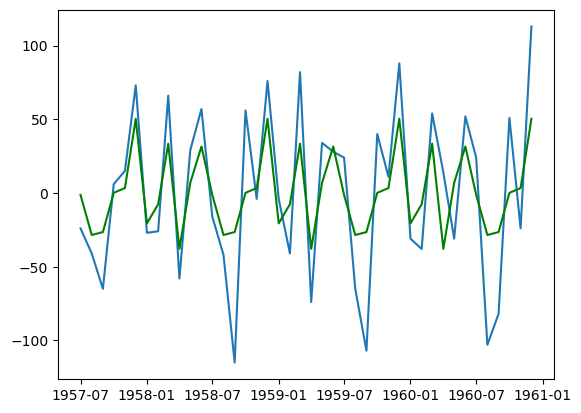

In [454]:
plt.plot(test)
plt.plot(prediction, color = 'green') 
#prediction is not accurate for high increase or decrease in passengers count

# Day 54

## ARIMA Model

In [1]:
from statsmodels.tsa.arima.model import ARIMA # new version use this
# for MA same import but make order=(0,0,any number) (p,d,q)
# for ARMA same import but make order=(any number,0,any number)

In [456]:
# from statsmodels.tsa.arima_model import ARIMA # dont use old version 

In [457]:
# By specifying the appropriate values for order and seasonal_order, you can tailor the ARIMA model to account for both non-seasonal and seasonal patterns in the time series data. This enables you to capture the overall trend, autoregressive and moving average effects, as well as the seasonal variations in the data, providing a more comprehensive and accurate modeling approach.
model_arima = ARIMA(train, seasonal_order =(2, 0,[2,3,4,5],12)) # since this is already converted to stationary d=0
# p and q can be list , d=2 means two times the difference has been done
# The seasonal_order component in the seasonal_order argument is used to capture patterns in the data that repeat at fixed intervals, such as weekly, monthly, or quarterly patterns.

In [459]:
model = model_arima.fit()

In statsmodel AIC (Akaike information criteria) balances the trade-off between model complexity and goodness-of-fit.

The AIC value is calculated based on the log-likelihood function and the number of parameters in the model. The formula for AIC is:

AIC = -2 * log-likelihood + 2 * k

In the formula, "log-likelihood" represents the maximized value of the log-likelihood function of the model, and "k" represents the number of parameters estimated in the model.


Adds penalty term to more complex model (large parameters) the aic encourages the selection of models thst explain the data well using as few parameters as possible. 

In [460]:
print(model.aic)

854.5867172246137


In [461]:
predictions = model.forecast(steps = 9)

In [462]:
predictions

1957-07-01    -7.785296
1957-08-01   -46.944303
1957-09-01   -34.209561
1957-10-01     3.015207
1957-11-01     8.663015
1957-12-01    62.564955
1958-01-01   -21.467759
1958-02-01   -22.943267
1958-03-01    60.312582
Freq: MS, Name: predicted_mean, dtype: float64

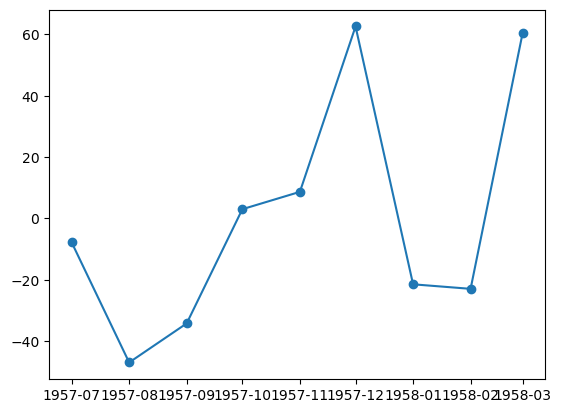

In [463]:
plt.plot(predictions, marker = 'o')

In [510]:
import itertools

p = q = range(2,5)
s=[12]
d=[0]

f = list(itertools.product(p, d, q,s))

In [465]:
f

[(2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 0, 5, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 0, 5, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 0, 5, 12),
 (5, 0, 2, 12),
 (5, 0, 3, 12),
 (5, 0, 4, 12),
 (5, 0, 5, 12)]

In [466]:
len(f)

16

In [467]:
params = []
aic_error = []

for i in f:
    model_arima = ARIMA(train, seasonal_order= i)
    model = model_arima.fit()
    print(i, model.aic)
    params.append(i)
    aic_error.append(model.aic)

(2, 0, 2, 12) 852.5619489466341
(2, 0, 3, 12) 854.471158108429
(2, 0, 4, 12) 854.4129710174399
(2, 0, 5, 12) 861.1776260295754
(3, 0, 2, 12) 852.8495133565597
(3, 0, 3, 12) 854.7777295935077
(3, 0, 4, 12) 856.2949015329422
(3, 0, 5, 12) 865.1099026986075
(4, 0, 2, 12) 854.3582910823465
(4, 0, 3, 12) 856.6323578938423
(4, 0, 4, 12) 857.8533069105331
(4, 0, 5, 12) 861.244447955526
(5, 0, 2, 12) 856.5424449010058
(5, 0, 3, 12) 858.274408232827
(5, 0, 4, 12) 859.5746676235659
(5, 0, 5, 12) 861.5690158455355


In [468]:
np.argmin(aic_error)

0

In [469]:
aic_error[0]

852.5619489466341

In [470]:
params[np.argmin(aic_error)]

# params[0]

(2, 0, 2, 12)

In [503]:
model_arima = ARIMA(train,seasonal_order = (2, 0, 2,12)) #since it is already converted to stationary d=0

In [504]:
model = model_arima.fit()

In [505]:
print(model.aic)

852.5619489466341


In [506]:
predictions = model.forecast(steps = 42)

In [507]:
predictions

1957-07-01   -11.300289
1957-08-01   -43.197771
1957-09-01   -34.126989
1957-10-01     1.732069
1957-11-01     9.838548
1957-12-01    61.477444
1958-01-01   -22.510696
1958-02-01   -19.447819
1958-03-01    56.853132
1958-04-01   -50.760075
1958-05-01     9.680095
1958-06-01    49.410458
1958-07-01    -6.410777
1958-08-01   -42.881720
1958-09-01   -29.409606
1958-10-01     0.695329
1958-11-01     7.305674
1958-12-01    59.981811
1959-01-01   -23.078845
1959-02-01   -16.799433
1959-03-01    51.659295
1959-04-01   -46.917436
1959-05-01    10.204456
1959-06-01    46.590179
1959-07-01    -8.859551
1959-08-01   -39.745879
1959-09-01   -29.992523
1959-10-01     1.320956
1959-11-01     8.338728
1959-12-01    56.348738
1960-01-01   -20.919212
1960-02-01   -17.084485
1960-03-01    50.921421
1960-04-01   -45.625880
1960-05-01     9.148905
1960-06-01    44.791149
1960-07-01    -6.640260
1960-08-01   -38.571813
1960-09-01   -27.294571
1960-10-01     0.883683
1960-11-01     7.115419
1960-12-01    54

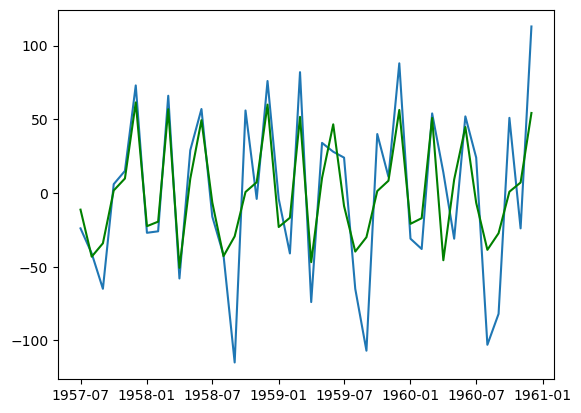

In [508]:
plt.plot(test)
plt.plot(predictions, color = 'green') 

In [509]:
# we can see good impprovement in the ARIMA model compared to Auto_regression model